In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
download_url = 'https://www.kaggle.com/datasets/mbaabuharun/craigslist-vehicles'

In [4]:
od.download(download_url)

Skipping, found downloaded files in ".\craigslist-vehicles" (use force=True to force download)


In [5]:
data_filename = '.\craigslist-vehicles/craigslist_vehicles.csv'

In [58]:
import pandas as pd
import pytz

In [59]:
df = pd.read_csv(data_filename, nrows=10000)  # Read the first 10,000 rows as an example


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   id            10000 non-null  int64  
 2   url           10000 non-null  object 
 3   region        10000 non-null  object 
 4   region_url    10000 non-null  object 
 5   price         10000 non-null  int64  
 6   year          9992 non-null   float64
 7   manufacturer  9665 non-null   object 
 8   model         9843 non-null   object 
 9   condition     6275 non-null   object 
 10  cylinders     5553 non-null   object 
 11  fuel          9950 non-null   object 
 12  odometer      9946 non-null   float64
 13  title_status  9760 non-null   object 
 14  transmission  9917 non-null   object 
 15  VIN           5952 non-null   object 
 16  drive         6862 non-null   object 
 17  size          2756 non-null   object 
 18  type          7842 non-null

In [9]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,10000.000000,1.000000e+04,1.000000e+04,9992.000000,9.946000e+03,0.0,9881.000000,9881.000000
mean,282358.035100,7.310791e+09,3.588872e+04,2011.003203,9.554652e+04,NaN,38.870140,-87.447119
std,40435.097849,4.341035e+06,1.259394e+06,9.952283,2.299699e+05,NaN,3.678029,14.038848
min,120490.000000,7.301593e+09,0.000000e+00,1923.000000,0.000000e+00,NaN,-25.262575,-128.686743
25%,261341.750000,7.307354e+09,5.995000e+03,2008.000000,3.666550e+04,NaN,35.110400,-106.522515
50%,265311.500000,7.311440e+09,1.399000e+04,2013.000000,8.562450e+04,NaN,40.680000,-81.494766
75%,288273.250000,7.314563e+09,2.750000e+04,2017.000000,1.300690e+05,NaN,41.144900,-75.171800
max,363434.000000,7.317059e+09,1.234568e+08,2021.000000,1.000000e+07,NaN,48.432675,-70.885698


In [10]:
# Identify numerical and categorical columns

In [11]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(exclude=['number'])

In [12]:
df[numerical_columns.columns] = df[numerical_columns.columns].fillna(df[numerical_columns.columns].median())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   id            10000 non-null  int64  
 2   url           10000 non-null  object 
 3   region        10000 non-null  object 
 4   region_url    10000 non-null  object 
 5   price         10000 non-null  int64  
 6   year          10000 non-null  float64
 7   manufacturer  9665 non-null   object 
 8   model         9843 non-null   object 
 9   condition     6275 non-null   object 
 10  cylinders     5553 non-null   object 
 11  fuel          9950 non-null   object 
 12  odometer      10000 non-null  float64
 13  title_status  9760 non-null   object 
 14  transmission  9917 non-null   object 
 15  VIN           5952 non-null   object 
 16  drive         6862 non-null   object 
 17  size          2756 non-null   object 
 18  type          7842 non-null

In [14]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,0.0,10000.000000,10000.000000
mean,282358.035100,7.310791e+09,3.588872e+04,2011.004800,9.549294e+04,NaN,38.891678,-87.376286
std,40435.097849,4.341035e+06,1.259394e+06,9.948461,2.293493e+05,NaN,3.661341,13.969978
min,120490.000000,7.301593e+09,0.000000e+00,1923.000000,0.000000e+00,NaN,-25.262575,-128.686743
25%,261341.750000,7.307354e+09,5.995000e+03,2008.000000,3.700825e+04,NaN,35.134700,-106.518300
50%,265311.500000,7.311440e+09,1.399000e+04,2013.000000,8.562450e+04,NaN,40.680000,-81.494766
75%,288273.250000,7.314563e+09,2.750000e+04,2017.000000,1.300000e+05,NaN,41.125860,-75.181123
max,363434.000000,7.317059e+09,1.234568e+08,2021.000000,1.000000e+07,NaN,48.432675,-70.885698


In [15]:
# Fill missing values in categorical columns with the mode

In [16]:
df[categorical_columns.columns] = df[categorical_columns.columns].fillna(df[categorical_columns.columns].mode().iloc[0])

In [66]:
#Set 'posting_date' as the Index:
# Set the time zone to Kenyan time (UTC+3)

In [70]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [71]:
kenya_timezone = pytz.timezone('Africa/Nairobi')
df['posting_date'] = df['posting_date'].dt.tz_convert(kenya_timezone)

In [72]:
df.set_index('posting_date', inplace=True)

In [73]:
df.to_csv("clean_craigslist_vehicles.csv")

In [74]:
clean_data = pd.read_csv("clean_craigslist_vehicles.csv")
print(clean_data)

                   posting_date  Unnamed: 0          id  \
0     2021-04-16 03:00:00+03:00      362773  7307679724   
1     2021-04-24 03:00:00+03:00      362712  7311833696   
2     2021-04-23 03:00:00+03:00      362722  7311441996   
3     2021-04-16 03:00:00+03:00      362771  7307680715   
4     2021-04-24 03:00:00+03:00      362710  7311834578   
...                         ...         ...         ...   
9995  2021-04-30 03:00:00+03:00      362951  7314654152   
9996  2021-05-02 03:00:00+03:00      362894  7315636694   
9997  2021-04-19 03:00:00+03:00      363176  7309561174   
9998  2021-04-26 03:00:00+03:00      363031  7313091974   
9999  2021-04-24 03:00:00+03:00      363059  7312103278   

                                                    url    region  \
0     https://abilene.craigslist.org/ctd/d/abilene-2...   abilene   
1     https://abilene.craigslist.org/ctd/d/abilene-2...   abilene   
2     https://abilene.craigslist.org/ctd/d/abilene-2...   abilene   
3     https://a

In [75]:
#Exploratory Data Analysis (EDA)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Summary statistics

In [78]:
summary_stats = clean_data.describe()

In [79]:
# Data distribution

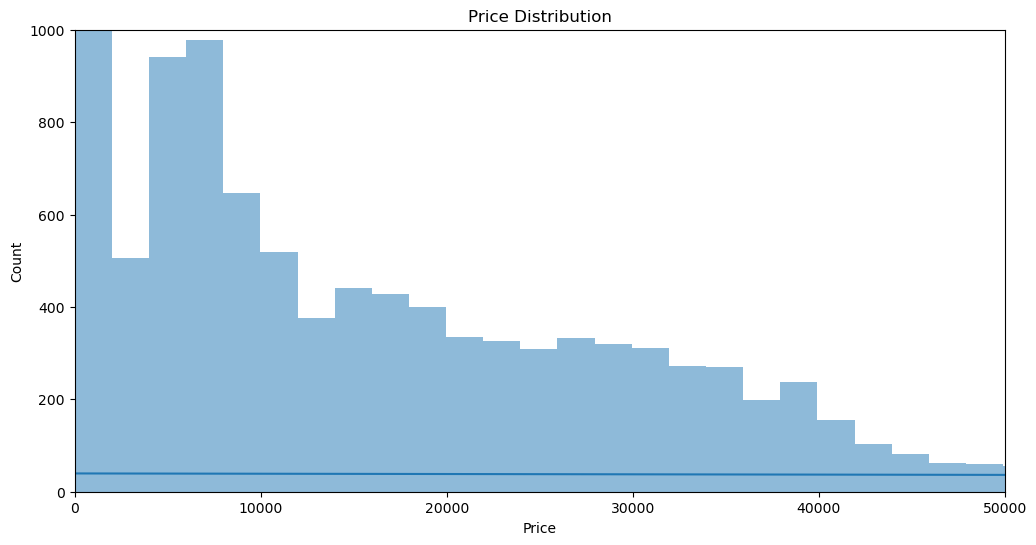

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(clean_data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')

# Set custom x-axis limits
plt.xlim(0, 50000)
# Set custom y-axis limits
plt.ylim(0, 1000)
plt.show()


In [81]:
#Temporal Analysis:

In [82]:
import matplotlib.dates as mdates

In [84]:
# Group by region and calculate the mean price

Text(0, 0.5, 'Mean Price')

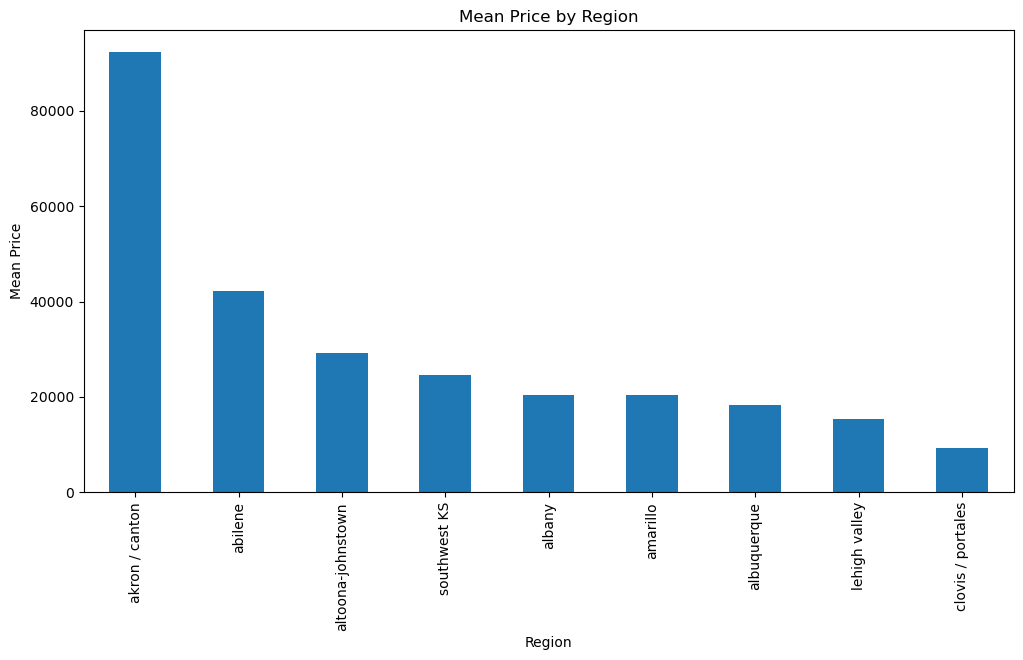

In [85]:
region_grouped = clean_data.groupby('region')['price'].mean().sort_values(ascending=False)
region_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Price by Region')
plt.xlabel('Region')
plt.ylabel('Mean Price')

In [88]:
# Group by vehicle type and calculate the median price

Text(0, 0.5, 'Median Price')

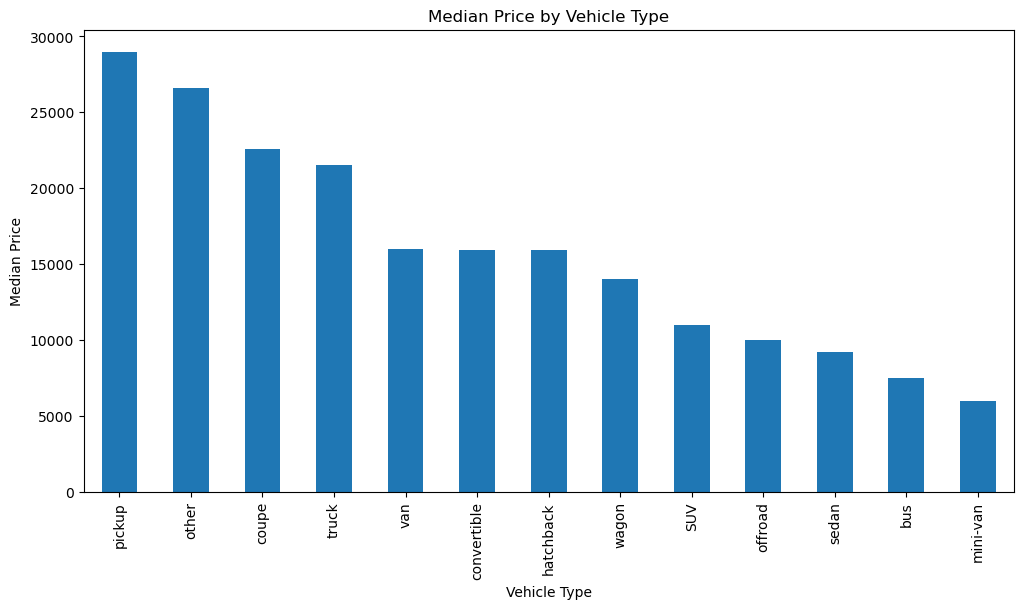

In [89]:
vehicle_type_grouped = clean_data.groupby('type')['price'].median().sort_values(ascending=False)
vehicle_type_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Median Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Median Price')

In [ ]:
#Correlation Analysis:

C:\Users\Admin\AppData\Local\Temp\ipykernel_2284\3770096520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

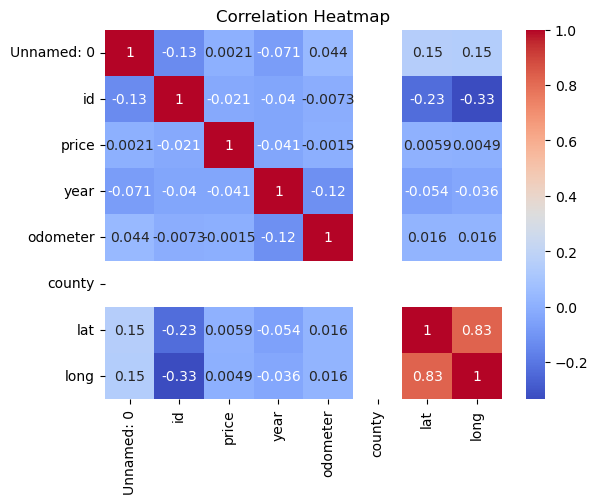

In [32]:
correlation_matrix = clean_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [44]:
# Fit an ARIMA model

In [90]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(clean_data['price'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast with the ARIMA model
forecast = model_fit.forecast(steps=10)


In [91]:
#Build the time-series chart.

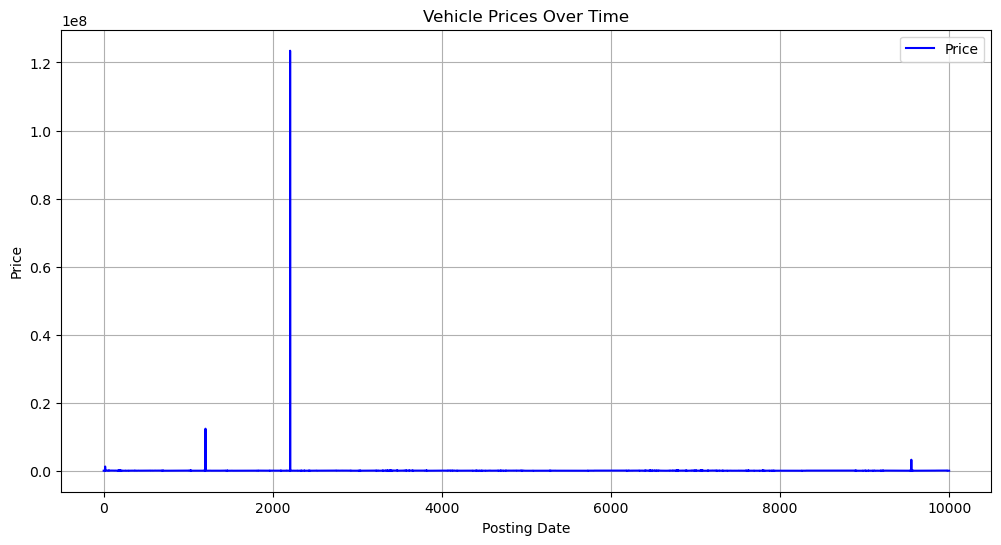

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(clean_data.index, clean_data['price'], label='Price', color='blue')
plt.title('Vehicle Prices Over Time')
plt.xlabel('Posting Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()